<a href="https://colab.research.google.com/github/iqbalguory/PGP-AIML/blob/main/AIML_Advanced_Computer_Vision_Face_Mask_Prediction_using_U_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

Imports

In [1]:
# Imports
import pandas as pd, matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
#### Add your code here ####
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Setting the current working directory
import os; os.chdir('drive/My Drive/Data/CV') 

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [4]:
!ls

images.npy


In [5]:
import tensorflow as tf

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

In [6]:
import numpy as np

#Reference: https://stackoverflow.com/questions/55890813/how-to-fix-object-arrays-cannot-be-loaded-when-allow-pickle-false-for-imdb-loa
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle = True, **k)

data = np.load('images.npy')

### Check one sample from the loaded "images.npy" file  (3 marks)
- Hint: print data[10][1] 

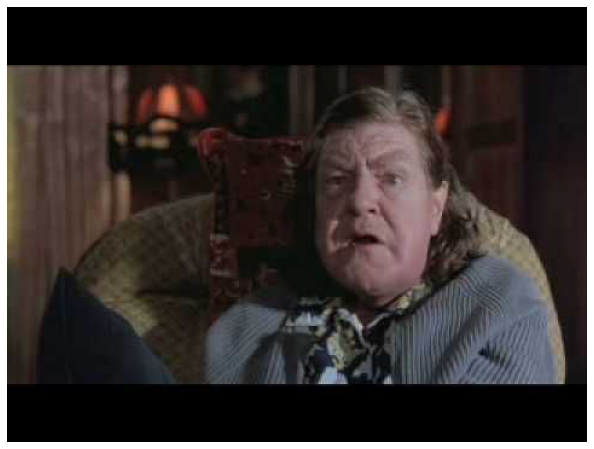

In [7]:
#### Add your code here ####
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(data[20][0])
plt.show()

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [8]:
#### Add your code here ####
ALPHA = 1
IMAGE_SIZE = 224
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [9]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [10]:
X.shape

(409, 224, 224, 3)

In [11]:
masks.shape

(409, 224, 224)

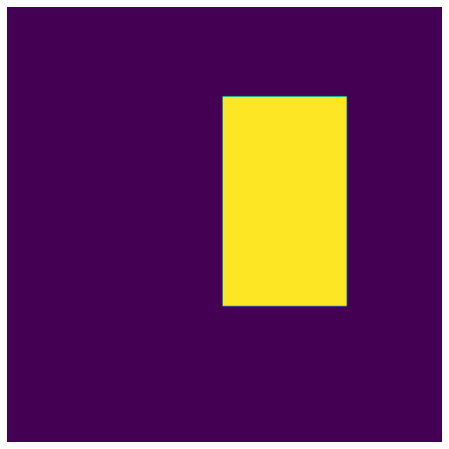

In [12]:
n = 20
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
_ = plt.imshow(masks[n])



```
# This is formatted as code
```

### Split the data into training and testing (3 marks)
- 400 images in training
- 9 images in testing data

Training data

In [13]:
X_train = X[0:399]
y_train = masks[0:399]

Testing data

In [14]:
X_test = X[400:408]
y_test = masks[400:408]

### Print a sample training image, image array and its mask (3 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[[-0.83529413, -0.72549021, -0.65490198],
        [-0.82745099, -0.70980394, -0.63921571],
        [-0.81176472, -0.68627453, -0.62352943],
        ...,
        [-0.87450981, -0.81960785, -0.77254903],
        [-0.87450981, -0.81960785, -0.75686276],
        [-0.86666667, -0.79607844, -0.73333335]],

       [[-0.8509804 , -0.7019608 , -0.65490198],
        [-0.8509804 , -0.7019608 , -0.65490198],
        [-0.83529413, -0.68627453, -0.63921571],
        ...,
        [-0.86666667, -0.81176472, -0.7647059 ],
        [-0.84313726, -0.78823531, -0.72549021],
        [-0.83529413, -0.7647059 , -0.70980394]],

       [[-0.84313726, -0.67843139, -0.63921571],
        [-0.83529413, -0.67058825, -0.63137257],
        [-0.84313726, -0.67843139, -0.63921571],
        ...,
        [-0.85882354, -0.80392158, -0.75686276],
        [-0.81960785, -0.7647059 , -0.70980394],
        [-0.81176472, -0.74117649, -0.68627453]],

       ...,

       [[-0.71764708, -0.59215689, -0.52941179],
        [-0

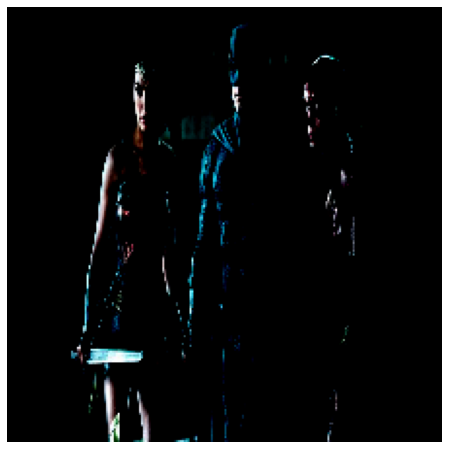

In [15]:
n = 15
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
_ = plt.imshow(X_train[n])
X_train[n]

Print the mask

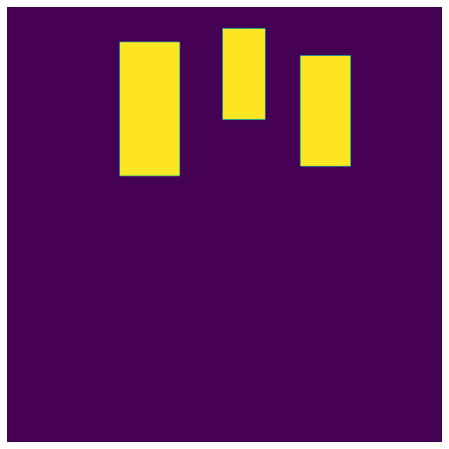

In [16]:
n = 15
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
_ = plt.imshow(y_train[n])


## Create the model (7 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [17]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, Activation, BatchNormalization, SpatialDropout2D

def conv_block_simple(prevlayer, filters, prefix, strides=(1, 1)):
    conv = Conv2D(filters, (3, 3), padding = 'same', kernel_initializer = 'he_normal', strides = strides, name = prefix + '_conv')(prevlayer)
    conv = BatchNormalization(name = prefix + 'BatchNormalization')(conv)
    conv = Activation('relu', name = prefix + 'ActivationLayer')(conv)
    return conv

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
  
    #### Add your code here ####
    block1 = model.get_layer('conv_pw_13_relu').output
    block2 = model.get_layer('conv_pw_11_relu').output
    block3 = model.get_layer('conv_pw_5_relu').output
    block4 = model.get_layer('conv_pw_3_relu').output
    block5 = model.get_layer('conv_pw_1_relu').output
    
    up1 = Concatenate()([UpSampling2D()(block1), block2])
    conv6 = conv_block_simple(up1, 256, 'Conv_6_1')
    conv6 = conv_block_simple(conv6, 256, 'Conv_6_2')

    up2 = Concatenate()([UpSampling2D()(conv6), block3])
    conv7 = conv_block_simple(up2, 256, 'Conv_7_1')
    conv7 = conv_block_simple(conv7, 256, 'Conv_7_2')

    up3 = Concatenate()([UpSampling2D()(conv7), block4])
    conv8 = conv_block_simple(up3, 192, 'Conv_8_1')
    conv8 = conv_block_simple(conv8, 128, 'Conv_8_2')

    up4 = Concatenate()([UpSampling2D()(conv8), block5])
    conv9 = conv_block_simple(up4, 96, 'Conv_9_1')
    conv9 = conv_block_simple(conv9, 64, 'Conv_9_2')

    up5 = Concatenate()([UpSampling2D()(conv9), model.input])
    conv10 = conv_block_simple(up5, 48, 'Conv_10_1')
    conv10 = conv_block_simple(conv10, 32, 'Conv_10_2')
    conv10 = SpatialDropout2D(0.2)(conv10)
    
    x = Conv2D(1, (1, 1), activation = 'sigmoid')(conv10)
    x = Reshape((IMAGE_SIZE, IMAGE_SIZE))(x)
    return Model(inputs = model.input, outputs = x)

### Call the create_model function (2 marks)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [18]:
model = create_model(False)


### Print model summary (2 marks)

In [19]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

### Define dice coefficient function (3 marks)
- Create a function to calculate dice coefficient


In [20]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss function (3 marks)

In [21]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [22]:
from tensorflow.keras.optimizers import Adam
adam = Adam(lr = 1e-4, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad = False)
model.compile(loss = loss, optimizer = adam, metrics = [dice_coefficient])


### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint('model_{loss:.2f}.h5', monitor = 'loss', verbose = 1, save_best_only = True, save_weights_only = True, mode = 'min', period = 1)
stop = EarlyStopping(monitor = 'loss', patience = 5, mode = 'min')
reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 5, min_lr = 1e-6, verbose = 1, mode = 'min')

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [ ]:


model.fit(X_train, y_train, epochs = 20, batch_size = 1, callbacks = [checkpoint, reduce_lr, stop], validation_data = (X_test, y_test))

Epoch 1/20
399/399 [==============================] - ETA: 0s - loss: 0.3636 - dice_coefficient: 0.7935
Epoch 00001: loss improved from 0.54045 to 0.36360, saving model to model_0.36.h5
399/399 [==============================] - 596s 1s/step - loss: 0.3636 - dice_coefficient: 0.7935 - val_loss: 0.7798 - val_dice_coefficient: 0.5921
Epoch 2/20
399/399 [==============================] - ETA: 0s - loss: 0.3040 - dice_coefficient: 0.8259
Epoch 00002: loss improved from 0.36360 to 0.30395, saving model to model_0.30.h5
399/399 [==============================] - 596s 1s/step - loss: 0.3040 - dice_coefficient: 0.8259 - val_loss: 0.8483 - val_dice_coefficient: 0.5933
Epoch 3/20
399/399 [==============================] - ETA: 0s - loss: 0.2638 - dice_coefficient: 0.8500
Epoch 00003: loss improved from 0.30395 to 0.26381, saving model to model_0.26.h5
399/399 [==============================] - 596s 1s/step - loss: 0.2638 - dice_coefficient: 0.8500 - val_loss: 0.7462 - val_dice_coefficient: 0.616

In [1]:
model.evaluate(X_test, y_test, verbose = 1)

NameError: ignored

### Get the predicted mask for a test image   (3 marks)

In [ ]:
# Load previous model weight
WEIGHTS_FILE = "model_0.11.h5"
learned_model = create_model()
learned_model.load_weights(WEIGHTS_FILE)
y_pred = learned_model.predict(X_test, verbose = 1)

Show the test image

In [ ]:
#### Add your code here ####

Show original mask for test image

In [ ]:
# For a sample image
n = 16
image = cv2.resize(X_test[n], dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
pred_mask = cv2.resize(1.0*(y_pred[n] > 0.1), (IMAGE_WIDTH, IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]
out_image = image2

fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')12
plt.imshow(out_image)

Predict the mask on the test image

In [ ]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(pred_mask, alpha = 1)

### Impose the mask on the test image (3 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

In [ ]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(X_test[n])
plt.savefig('image.jpg', bbox_inches = 'tight', pad_inches = 0)